# Linear Regression

*Pranav Shah* 

## Introduction

## Summary

## Prepare Data

Our first step in our process of examining price of autos is to get and prepare the auto data so that it can be consumed by regression functions and manipulated into a model matrix.

### Get data

In [1]:
# get data
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price <- read.auto()

str(auto.price)

Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”

'data.frame':	195 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

### Remove symboling and normalized losses 

These varibles need to be removed prior to inputting data into functions.

In [2]:
# remove symbolizing and normalized losses
library(dplyr)
auto.price <- auto.price %>% dplyr::select(-normalized.losses,-symboling)

Warning message:
“package ‘dplyr’ was built under R version 3.2.5”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Scale numerical data

In order to correctly evaluate a features' regression coefficients on the same scale, we need to scale the data with z-score transformation.

In [4]:
# scale numerical and int columns
auto.price.scaled <- data.frame(lapply(auto.price, function(x) if (is(x, "numeric")) scale(x) else x))
    
str(auto.price.scaled)

'data.frame':	195 obs. of  24 variables:
 $ make             : Factor w/ 21 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 3 ...
 $ fuel.type        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration       : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 1 ...
 $ num.of.doors     : Factor w/ 3 levels "?","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ body.style       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 4 ...
 $ drive.wheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 3 ...
 $ engine.location  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheel.base       : num  -1.6791 -1.6791 -0.717 0.1474 0.0821 ...
 $ length           : num  -0.437 -0.437 -0.245 0.188 0.188 ...
 $ width            : num  -0.838 -0.838 -0.181 0.147 0.241 ...
 $ height           : num  -2.112 -2.112 -0.61 0.183 0.183 ...
 $ curb.weight      : num  -0.021 -0.021 0.503 -0.423 0.505 ...
 $ engine.type      : Factor w/ 5 levels "dohc","l","ohc",..

In [38]:
nums <- sapply(auto.price, is.numeric)
auto.price.scaled <- auto.price
auto.price.scaled[, nums] <- lapply(auto.price[,nums], scale)
auto.price.scaled[, !nums] <- lapply(auto.price[,!nums], as.factor)

str(auto.price.scaled)

'data.frame':	195 obs. of  24 variables:
 $ make             : Factor w/ 21 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 3 ...
 $ fuel.type        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration       : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 1 ...
 $ num.of.doors     : Factor w/ 3 levels "?","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ body.style       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 4 ...
 $ drive.wheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 3 ...
 $ engine.location  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheel.base       : num [1:195, 1] -1.6791 -1.6791 -0.717 0.1474 0.0821 ...
  ..- attr(*, "scaled:center")= num 98.9
  ..- attr(*, "scaled:scale")= num 6.13
 $ length           : num [1:195, 1] -0.437 -0.437 -0.245 0.188 0.188 ...
  ..- attr(*, "scaled:center")= num 174
  ..- attr(*, "scaled:scale")= num 12.5
 $ width            : num [1:195, 1] -0.838 -0.838 -0.181 0.147 0.241 

Examing the structure of the auto data after applying scaling, we see that integer and numerical columns were transformed to a common scale. Addtionally, the character columns are transformed to factors.

### Create Model Matrix

Next we will construct a model matrix, which will be used in the singular value decompistition and ridge/lasso regression functions. The model matrix constructs a column for each feature. For categorical features, dummy variables for all levels are created. Additionally, we igonore creating an intercept so that all factor levels are expressed as individual dummy variables.

In [47]:
mod.auto <- model.matrix(price~. -1, data = auto.price.scaled)

In [41]:
str(data.frame(mod.auto))

'data.frame':	195 obs. of  60 variables:
 $ makealfa.romero       : num  1 1 1 0 0 0 0 0 0 0 ...
 $ makeaudi              : num  0 0 0 1 1 1 1 1 1 0 ...
 $ makebmw               : num  0 0 0 0 0 0 0 0 0 1 ...
 $ makechevrolet         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makedodge             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makehonda             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makeisuzu             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makejaguar            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makemazda             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makemercedes.benz     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makemercury           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makemitsubishi        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makenissan            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makepeugot            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makeplymouth          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makeporsche           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ makesaab              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ make

When looking at the model matrix, there is an absence of the intercept. Additionally, make has all 21 levels, but the other factors show #levels - 1 dummy columns. For instance, fuel type only has a feature for gas, but has two factors - gas and diesel. The representation is still valid where 0 represents diesel. I'm not sure why the model.matrix function creates dummies for all levels with the first factor variable, but subtracts one for each subsequent. Maybe it is trying to reduce redundancy. 

## Stepwise Regression

Here we will run a stepwise linear regression with unscaled price as the target variable. 

### Linear regression with all features

As a baseline we will run a linear regression with all the features on the un-scaled (real) price. From the summary, we see that the adjusted R^2 is about .9527, but we see some decrease in residuals price increases, and an upward trajectory of the standardized residuals. Additionally, the Q-Q plot seems to have some tail off in the upper quartiles. We'll try to improve on the model by reducing the feature set with stepwise regression.

Loading required package: repr
Warning message:
“package ‘repr’ was built under R version 3.2.5”


Call:
lm(formula = price.real ~ ., data = auto.price.scaled %>% dplyr::select(-log.price, 
    -price))

Residuals:
    Min      1Q  Median      3Q     Max 
-3512.5  -916.1     0.0   804.9  8399.5 

Coefficients: (3 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             31908.9     6808.7   4.687 6.59e-06 ***
makeaudi                  123.9     2239.3   0.055 0.955960    
makebmw                  5094.7     2331.4   2.185 0.030554 *  
makechevrolet           -5341.9     2287.0  -2.336 0.020945 *  
makedodge               -6049.2     1878.5  -3.220 0.001598 ** 
makehonda               -3118.2     2207.5  -1.413 0.160029    
makeisuzu               -3885.0     2474.9  -1.570 0.118760    
makejaguar              -1492.2     2800.8  -0.533 0.595036    
makemazda               -2829.3     1709.1  -1.655 0.100107    
makemercedes-benz        1512.5     2515.2   0.601 0.548599    
makemercury             -4545.6     2950.

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

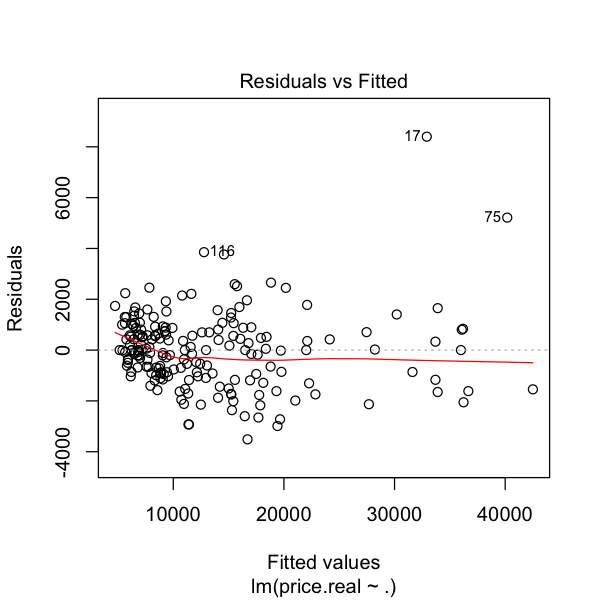

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

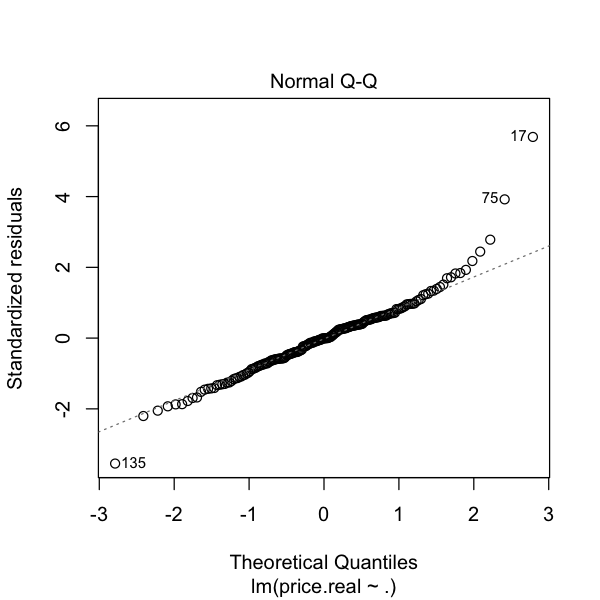

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

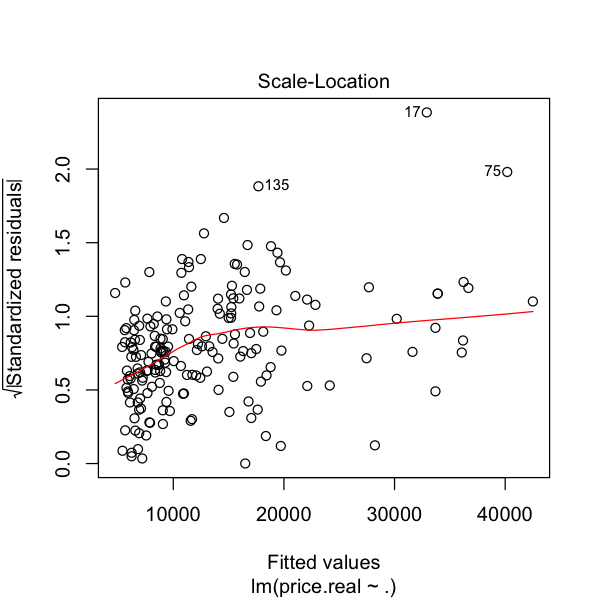

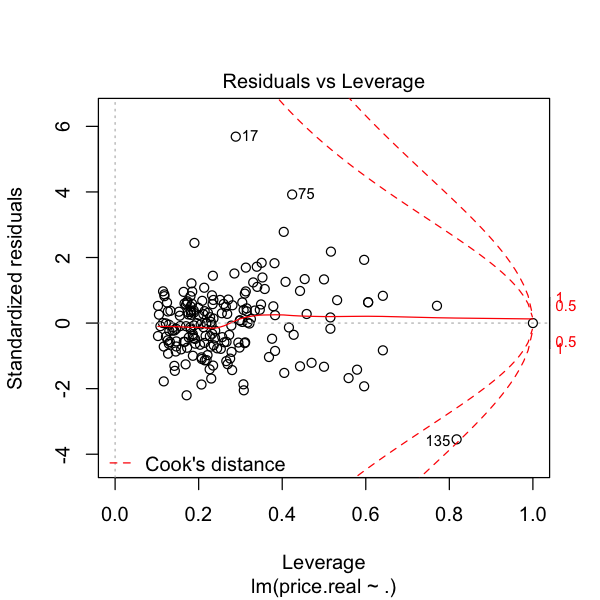

In [51]:
auto.price.scaled$price.real <- auto.price$price
auto.price.scaled$log.price <- log(auto.price$price)

require(repr)
options(repr.plot.width=5, repr.plot.height=5)

lm.auto <- lm(price.real ~ ., data = auto.price.scaled %>% dplyr::select(-log.price, -price))
summary(lm.auto)
plot(lm.auto)

### StepAIC 

Next we'll use a stepwise regression method to converge and select features that have the most influence on price. In stepwise regression in both directions, features are removed and added in an iterative process based which minimizes the  AIC (Akanie Information Criterion).

The following features remain in the model:

    make + aspiration + body.style + wheel.base + 
    length + width + height + curb.weight + engine.type + num.of.cylinders + 
    engine.size + fuel.system + bore + stroke + compression.ratio + 
    peak.rpm + highway.mpg
    
The following features were removed:
    
- engine.location	
- fuel.type	
- drive.wheels
- num.of.doors
- city.mpg
- horsepower

In terms of performance the final model resulted in a slight increase in adjusted R^2, which suggests the model has similar performance as the baseline linear regression, but with fewer features. The residuals still exhibit slight instability as in the baseline linear regression. 

Start:  AIC=2959.22
price.real ~ make + fuel.type + aspiration + num.of.doors + body.style + 
    drive.wheels + engine.location + wheel.base + length + width + 
    height + curb.weight + engine.type + num.of.cylinders + engine.size + 
    fuel.system + bore + stroke + compression.ratio + horsepower + 
    peak.rpm + city.mpg + highway.mpg


Step:  AIC=2959.22
price.real ~ make + fuel.type + aspiration + num.of.doors + body.style + 
    drive.wheels + wheel.base + length + width + height + curb.weight + 
    engine.type + num.of.cylinders + engine.size + fuel.system + 
    bore + stroke + compression.ratio + horsepower + peak.rpm + 
    city.mpg + highway.mpg


Step:  AIC=2959.22
price.real ~ make + aspiration + num.of.doors + body.style + 
    drive.wheels + wheel.base + length + width + height + curb.weight + 
    engine.type + num.of.cylinders + engine.size + fuel.system + 
    bore + stroke + compression.ratio + horsepower + peak.rpm + 
    city.mpg + highway.mpg

                

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,138,423428758,2959.225
- engine.location,0,1.072884e-06,138,423428758,2959.225
- fuel.type,0,1.490116e-06,138,423428758,2959.225
- drive.wheels,2,1.393915e+06,140,424822673,2955.866
- num.of.doors,2,1.448704e+06,142,426271377,2952.529
- city.mpg,1,6.447088e+04,143,426335848,2950.559
- horsepower,1,6.586857e+05,144,426994533,2948.860



Call:
lm(formula = price.real ~ make + aspiration + body.style + wheel.base + 
    length + width + height + curb.weight + engine.type + num.of.cylinders + 
    engine.size + fuel.system + bore + stroke + compression.ratio + 
    peak.rpm + highway.mpg, data = auto.price.scaled %>% dplyr::select(-log.price, 
    -price))

Residuals:
    Min      1Q  Median      3Q     Max 
-3458.8 -1022.1     0.0   767.4  8238.9 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             18092.95    3741.95   4.835 3.38e-06 ***
makeaudi                   88.46    2125.96   0.042 0.966868    
makebmw                  5069.21    2242.38   2.261 0.025281 *  
makechevrolet           -5492.31    2126.31  -2.583 0.010790 *  
makedodge               -6377.70    1775.80  -3.591 0.000450 ***
makehonda               -3420.00    2064.42  -1.657 0.099770 .  
makeisuzu               -4022.60    2351.20  -1.711 0.089258 .  
makeja

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

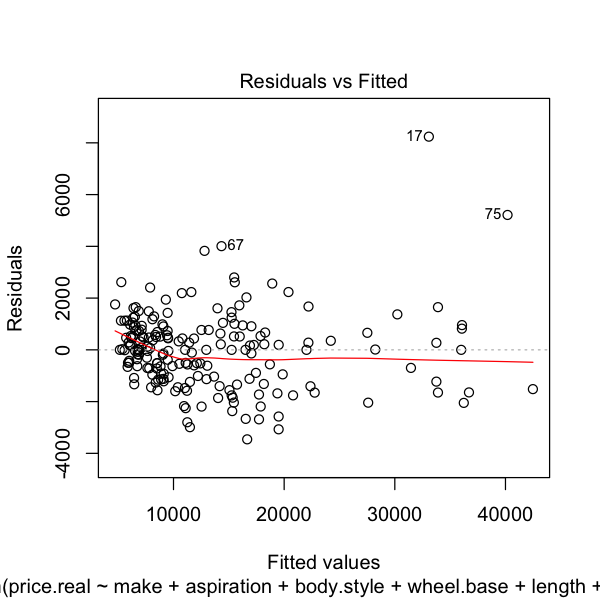

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

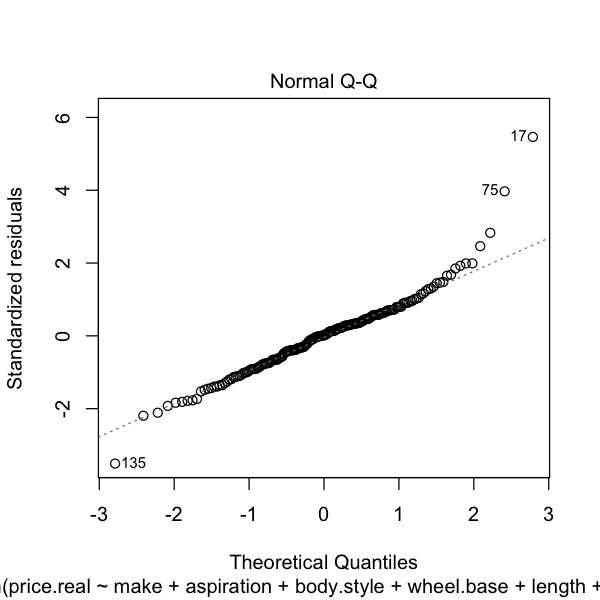

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

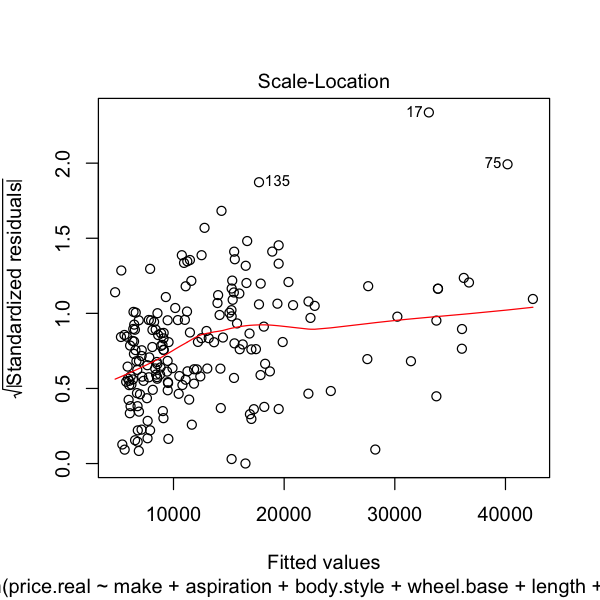

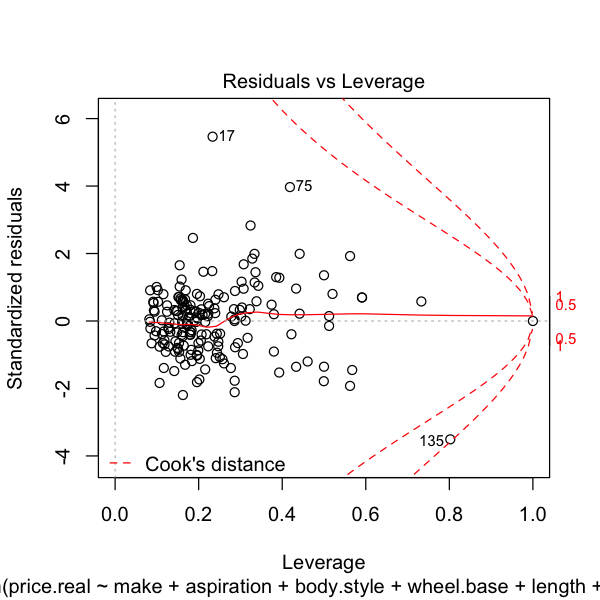

In [52]:
lm.auto.step <- stepAIC(lm.auto, direction = "both")
lm.auto.step$anova
summary(lm.auto.step)
plot(lm.auto.step)

## Singular Value Decomposition

Stepwise regression can be very computationally inefficient at scale. The SVD attempts to assign coefficients and wieghts to all features in a stabalized model matrix. Our goal is to minimize mean squared error with these feature coefficients. 

First we must check to see if the svd of model matrix is rank deficient, or if any of the singular values are essentially zero and not of the same magnitude as the other values. From the plots below of the singular values and log singular values we can see that the last 3 values are near zero and not the same magnitude has the other singular values. This suggests that the matrix is rank deficient.

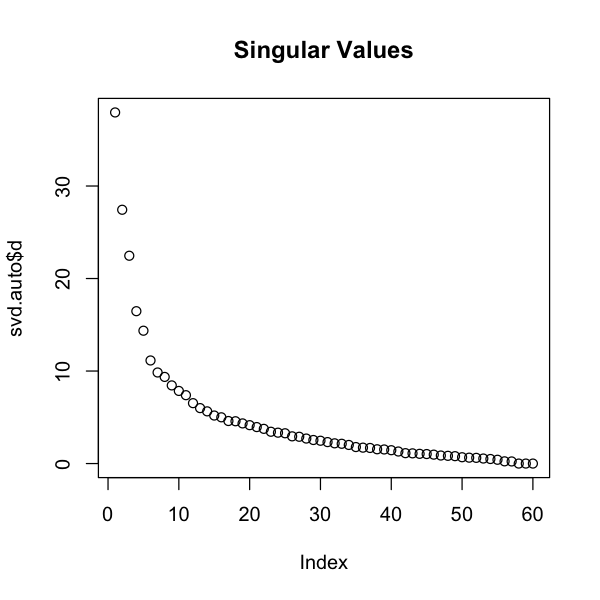

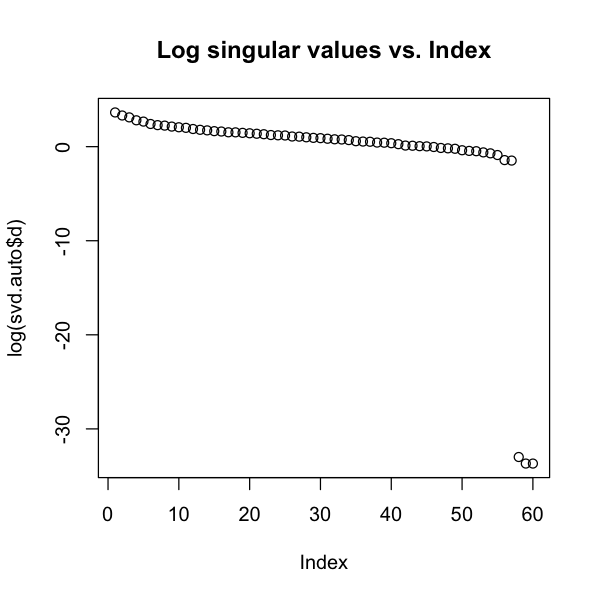

In [54]:
svd.auto <- svd(mod.auto)
plot(svd.auto$d, main = "Singular Values")
plot(log(svd.auto$d), main = "Log singular values vs. Index")

Next we'll set the singular values that we've identified as possible cause of rank deficiency to zero and calculate the inverse singular matrix. Then we'll calculate the pseudo inverse matrix.

Note: That here we only show the last three values in the singular vector set to zero, but we tested several other possible values that didn't result in a significantly better model.

In [67]:
# get the inverse of the singular matrix and set "outliers to zero"
dtrim <- rep(0, length(svd.auto$d))
dtrim[1:57] <- 1/svd.auto$d[1:57]
dM <- diag(dtrim)
# pseudo inverse matrix
InvM <- svd.auto$v %*% dM %*% t(svd.auto$u)
# check psuedo inverse times model matrix
invMM <- InvM %*% mod.auto

Next we calculate the model coeffiecents with the psuedo inverse matrix. 

Note: Here we show scaled price times the pseudo inverse, but we also tried real price and log price which resulted in strange residual values. We'll continue with the scaled price.

In [68]:
bM <- InvM %*% auto.price.scaled$price

Next, we'll calculate the score (predicted value) and residuals from the model matrix and coefficients.

In [69]:
auto.results.svd <- data.frame(actual = auto.price.scaled$price)
auto.results.svd$score <- mod.auto %*% bM + mean(auto.price.scaled$price)
auto.results.svd$resids <- auto.results.svd$score - auto.results.svd$actual

Finally, we can plot the fitted values (scores) and the residuals to understand the performance.

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


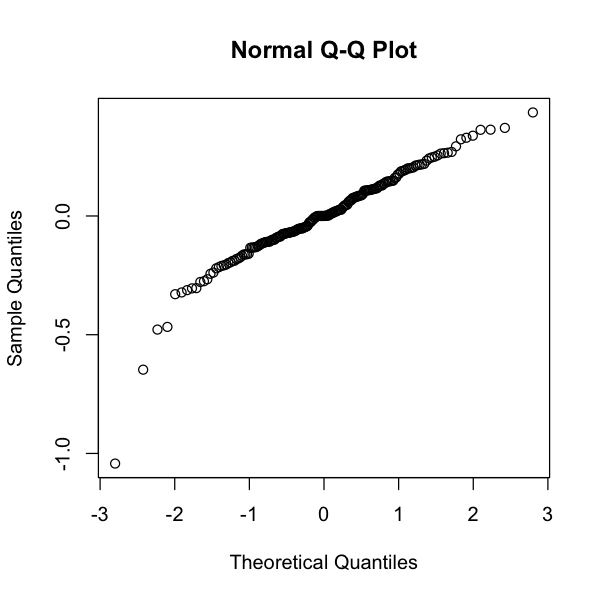

`geom_smooth()` using method = 'loess'


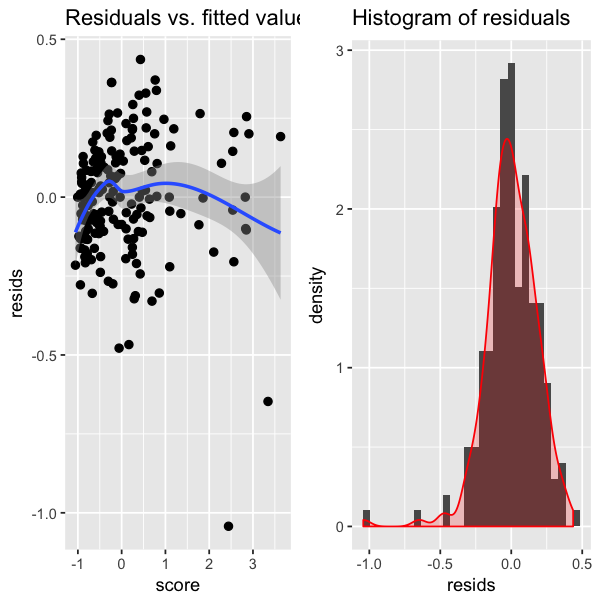

SSE = 187.476121771932 
SSR = 6.52387822806849 
SST = 194 
RMSE = 0.971378869284619 
Adjusted R^2 = 0.951314341581578 


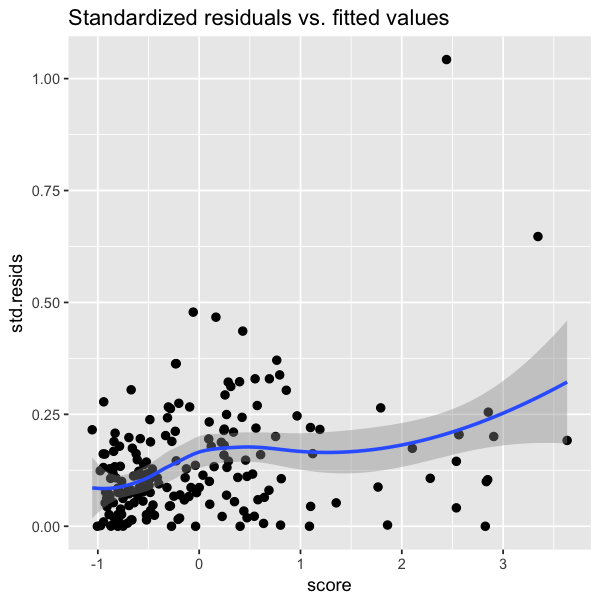

In [70]:
plot.svd.reg <- function(df, k = 4){
  require(ggplot2)
  require(gridExtra)
  
  p1 <- ggplot(df) + 
    geom_point(aes(score, resids), size = 2) + 
    stat_smooth(aes(score, resids)) +
    ggtitle('Residuals vs. fitted values')
  
  p2 <- ggplot(df, aes(resids)) +
    geom_histogram(aes(y = ..density..)) +
    geom_density(color = 'red', fill = 'red', alpha = 0.2) +
    ggtitle('Histogram of residuals')
  
  qqnorm(df$resids)
  
  grid.arrange(p1, p2, ncol = 2)
  
  df$std.resids = sqrt((df$resids - mean(df$resids))^2)  
  
  p3 = ggplot(df) + 
    geom_point(aes(score, std.resids), size = 2) + 
    stat_smooth(aes(score, std.resids)) +
    ggtitle('Standardized residuals vs. fitted values')
  print(p3) 
  
  n = nrow(df)
  Ybar = mean(df$actual)
  SST <- sum((df$actual - Ybar)^2)
  SSR <- sum(df$resids * df$resids)
  SSE = SST - SSR
  cat(paste('SSE =', as.character(SSE), '\n'))
  cat(paste('SSR =', as.character(SSR), '\n'))
  cat(paste('SST =', as.character(SSE + SSR), '\n'))
  cat(paste('RMSE =', as.character(SSE/(n - 2)), '\n'))
  
  adjR2  <- 1.0 - (SSR/SST) * ((n - 1)/(n - k - 1))
  cat(paste('Adjusted R^2 =', as.character(adjR2)), '\n')
}

plot.svd.reg(auto.results.svd, k = 60)

From the above plots and summary statistics we see there is quite a bit of instability in the standardized and regular residuals vs score and fitted values. Even though the Adjusted R^2 is similar to our previous stepwise attempt, this model seems to exhibit some instability. 

## Ridge and Lasso with Elastic Net

We can also apply penalities to coefficients with L2 (ridge) and L1 (lasso) to stabalize the inverse function. Using the glmnet function with alpha set to 0.5 (half penalty wieght set ridge and half to lasso), we can test several lambda values.

When evaluating these functions 

Loading required package: glmnet
Warning message:
“package ‘glmnet’ was built under R version 3.2.4”Loading required package: Matrix
Warning message:
“package ‘Matrix’ was built under R version 3.2.5”Loading required package: foreach
Loaded glmnet 2.0-5



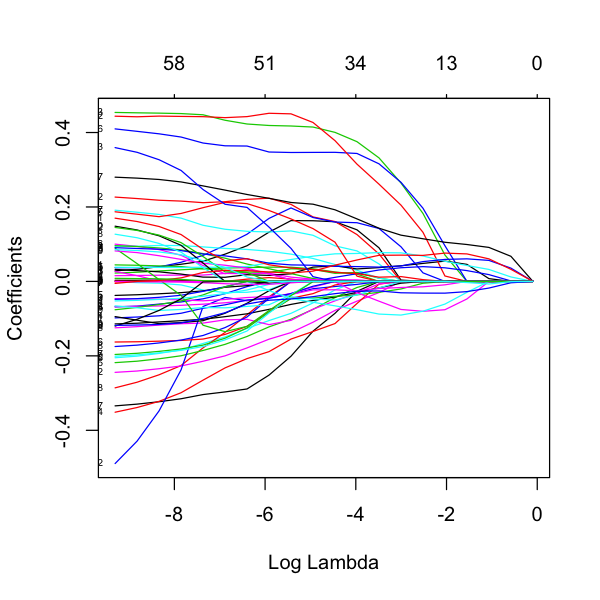

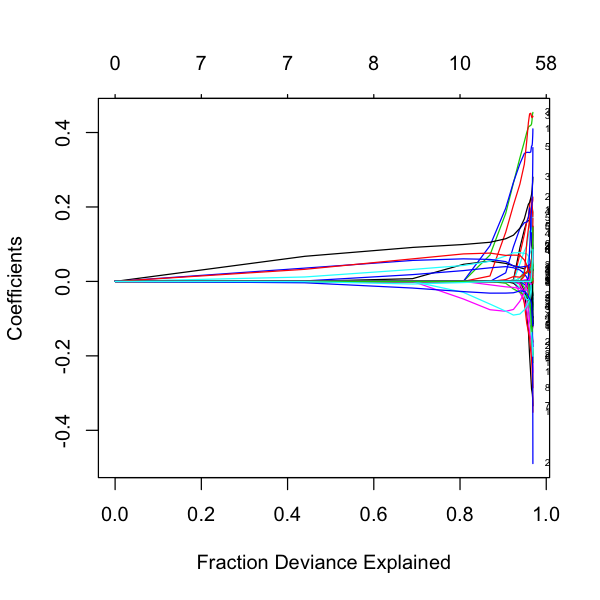

In [71]:
require(glmnet)

b <- auto.price.scaled$log.price

auto.ridge.lasso <- glmnet(mod.auto, b, family = 'gaussian', nlambda = 20, alpha = 0.5)
plot(auto.ridge.lasso, xvar = 'lambda', label = TRUE)
plot(auto.ridge.lasso, xvar = 'dev', label = TRUE)

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


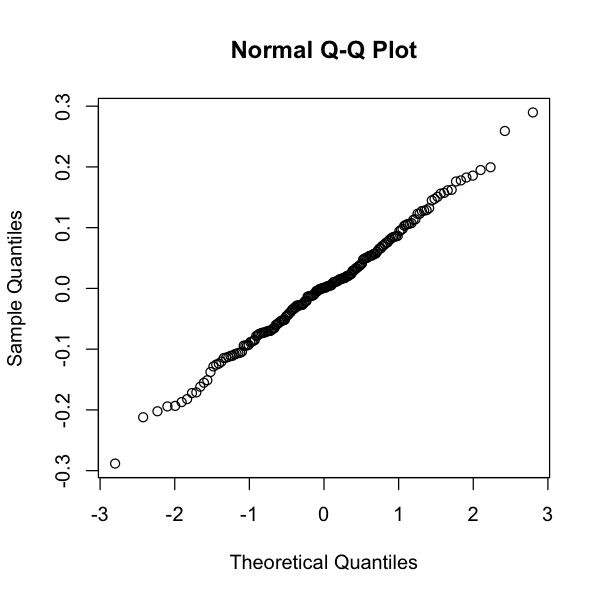

`geom_smooth()` using method = 'loess'


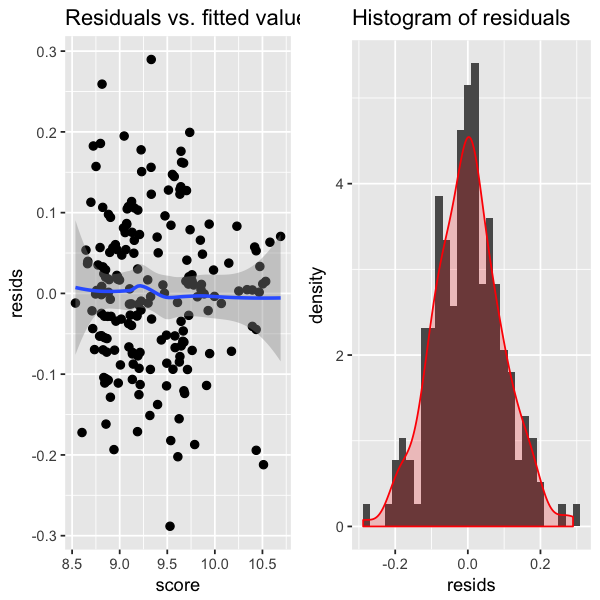

SSE = 48.5415161228196 
SSR = 1.71452098280996 
SST = 50.2560371056296 
RMSE = 0.251510446232226 
Adjusted R^2 = 0.953717132605065 


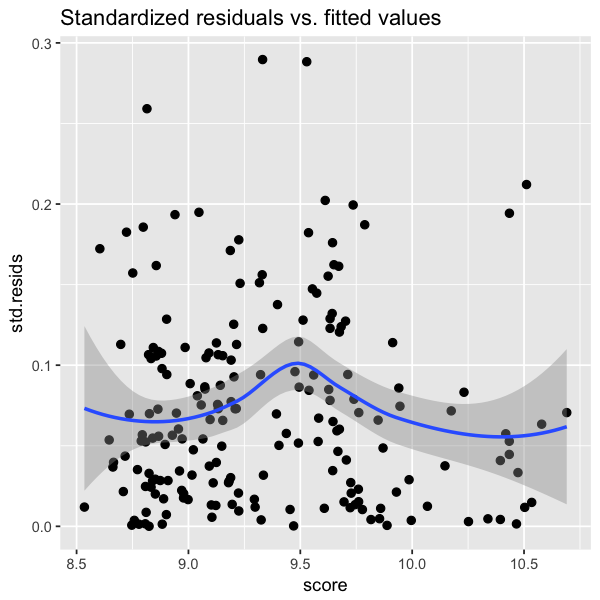

In [72]:
auto.results.eln  <- data.frame(actual = b)
auto.results.eln$score <- predict(auto.ridge.lasso, newx = mod.auto)[,14]
auto.results.eln$resids <- auto.results.eln$score - auto.results.eln$actual

plot.svd.reg(auto.results.eln, k = auto.ridge.lasso$df[14])